In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-prediction/Cellphone.csv
/kaggle/input/mobile-price-prediction/Cellphone.xlsx


# Importing Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../input/mobile-price-prediction/Cellphone.csv')

In [4]:
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


# Checking for Missing Values

In [5]:
df.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

# Checking for Duplicated Values

In [6]:
df[df.duplicated()]

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness


Removing the unwanted column 'Product_id'

In [7]:
df.drop('Product_id', inplace = True, axis = 1)

# Data Preprocessing

In [8]:
df.describe()

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


Seems like there are some outliers in the weight and thickness columns. We need to remove the outliers for better accuracy and to avoid overfitting.

In [9]:
df.shape

(161, 13)

**Removal of Outliers using the Standard Deviation Method**

Weight Column Outlier Removal

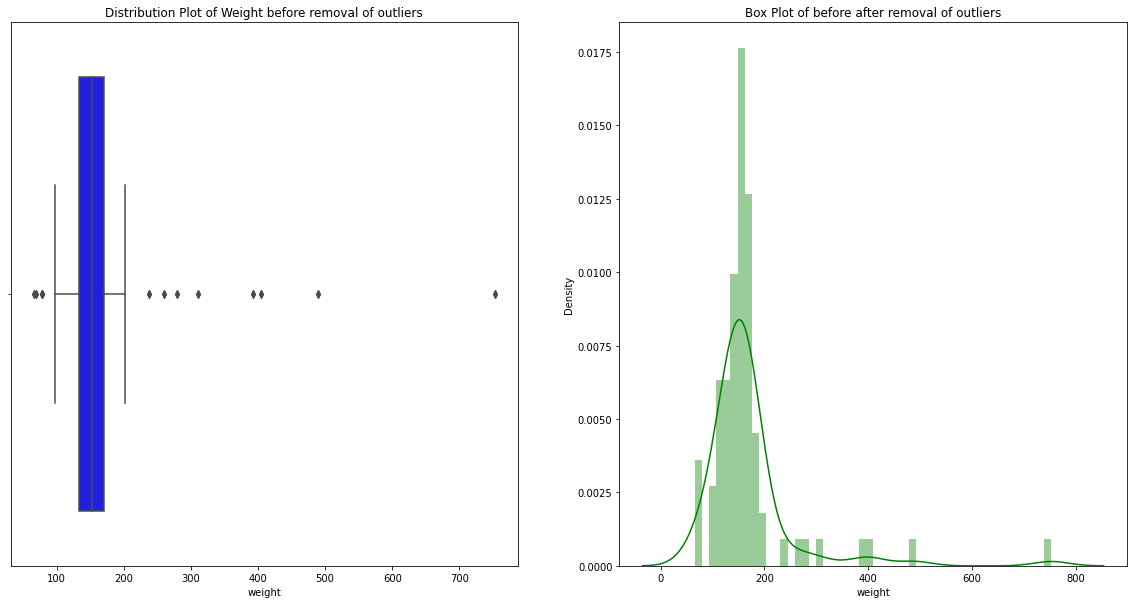

In [10]:
fig, ax = plt.subplots(1,2, figsize = (20,10))
sns.boxplot(df['weight'], ax = ax[0], color = 'b')
sns.distplot(df['weight'], ax = ax[1], color = 'g')
ax[0].set_title('Distribution Plot of Weight before removal of outliers')
ax[1].set_title('Box Plot of before after removal of outliers')
plt.show()

In [11]:
lower_limit = df['weight'].mean() - 3*df['weight'].std()
upper_limit = df['weight'].mean() + 3*df['weight'].std()

In [12]:
df = df[df['weight'] < upper_limit ]

In [13]:
df[df['weight'] < lower_limit ]

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness


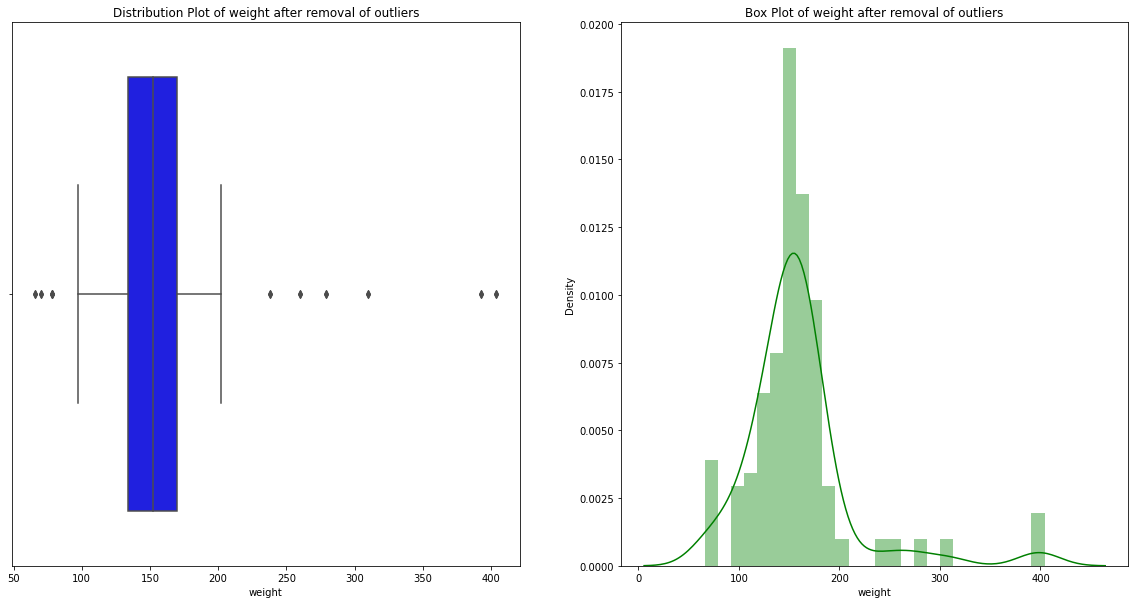

In [14]:
fig, ax = plt.subplots(1,2, figsize = (20,10))
sns.boxplot(df['weight'], ax = ax[0], color = 'b')
sns.distplot(df['weight'], ax = ax[1], color = 'g')
ax[0].set_title('Distribution Plot of weight after removal of outliers')
ax[1].set_title('Box Plot of weight after removal of outliers')
plt.show()

In [15]:
df.describe()

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,2213.254777,631.038217,158.946497,5.058599,337.592357,4.828025,1.491949,24.514497,2.197478,10.477070,4.566879,2699.235669,8.947771
std,777.275443,1564.775719,55.358625,1.175743,135.574086,2.447339,0.601143,29.143473,1.627670,6.224035,4.378596,1030.240382,2.214248
min,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,1734.000000,37.000000,134.000000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,2258.000000,106.000000,152.000000,5.100000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2700.000000,8.500000
75%,2744.000000,378.000000,170.000000,5.500000,432.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3200.000000,9.900000
max,4361.000000,9807.000000,404.000000,8.000000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,7000.000000,18.500000


Thickness column outlier removal

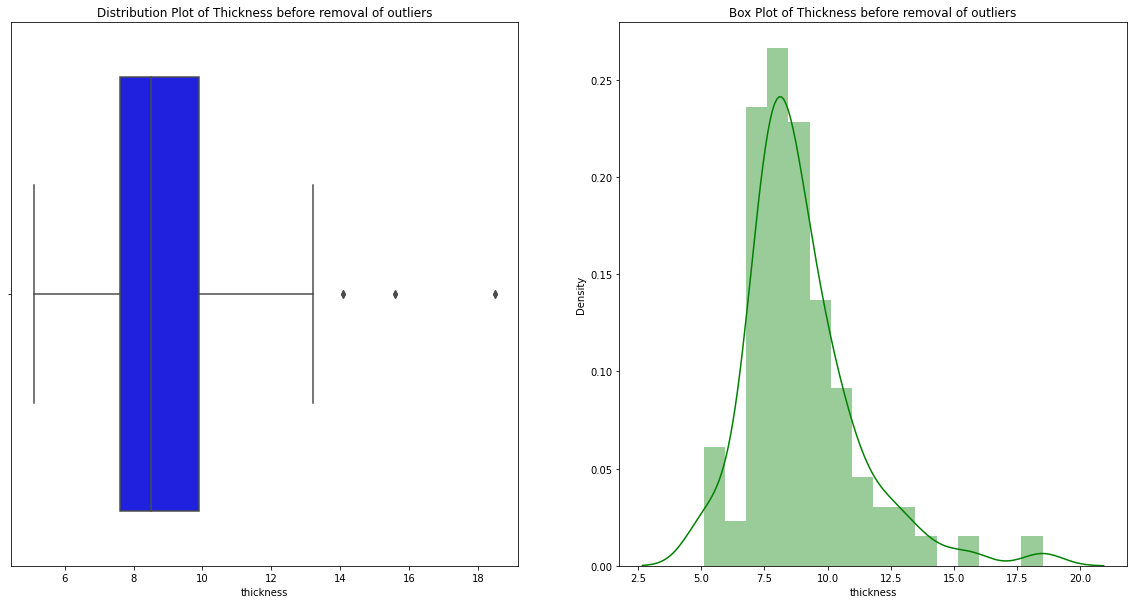

In [16]:
fig, ax = plt.subplots(1,2, figsize = (20,10))
sns.boxplot(df['thickness'], ax = ax[0], color = 'b')
sns.distplot(df['thickness'], ax = ax[1], color = 'g')
ax[0].set_title('Distribution Plot of Thickness before removal of outliers')
ax[1].set_title('Box Plot of Thickness before removal of outliers')
plt.show()

In [17]:
lower_limit = df['thickness'].mean() - 3*df['thickness'].std()
upper_limit = df['thickness'].mean() + 3*df['thickness'].std()

In [18]:
df = df[df['thickness'] < upper_limit]

In [19]:
df[df['thickness'] < lower_limit]

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness


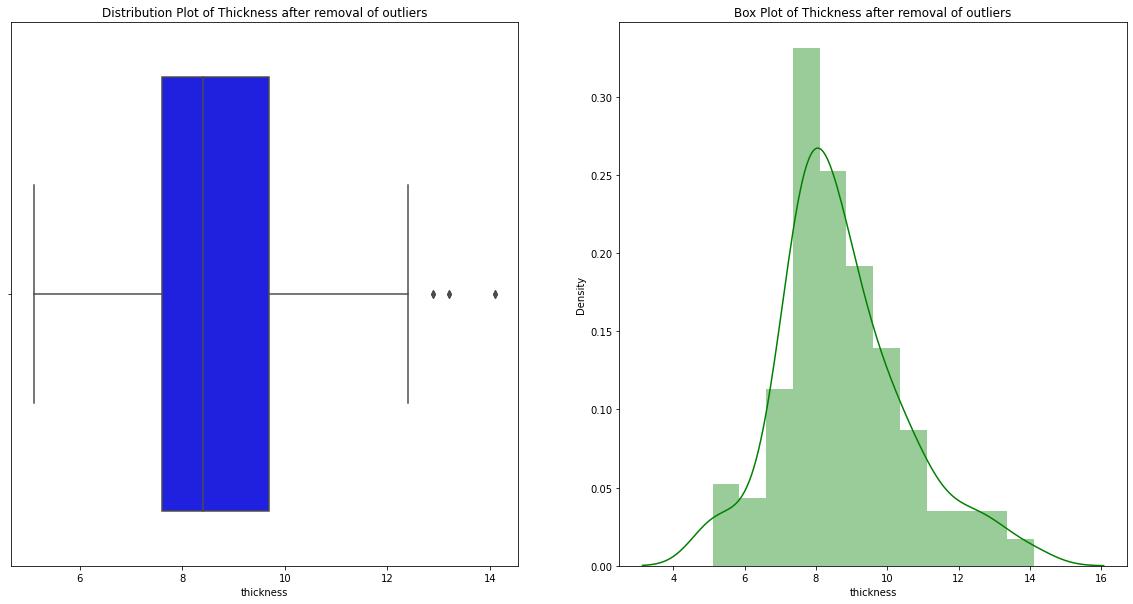

In [20]:
fig, ax = plt.subplots(1,2, figsize = (20,10))
sns.boxplot(df['thickness'], ax = ax[0], color = 'b')
sns.distplot(df['thickness'], ax = ax[1], color = 'g')
ax[0].set_title('Distribution Plot of Thickness after removal of outliers')
ax[1].set_title('Box Plot of Thickness after removal of outliers')
plt.show()

In [21]:
df.describe()

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,2253.69281,625.653595,160.318954,5.133333,343.071895,4.954248,1.530954,25.150379,2.252837,10.707843,4.686275,2745.620915,8.735948
std,745.25953,1583.457336,55.411851,1.094572,132.957804,2.348964,0.557472,29.252658,1.611797,6.136022,4.371891,1002.150044,1.789943
min,614.00000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,1741.00000,36.000000,135.000000,5.000000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.900000,2100.000000,7.600000
50%,2266.00000,101.000000,153.000000,5.150000,306.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,2746.00000,344.000000,170.000000,5.500000,432.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3200.000000,9.700000
max,4361.00000,9807.000000,404.000000,8.000000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,7000.000000,14.100000


We are now good to go for data modelling.

# Data Modelling using Regression Techniques

In [22]:
X = df.drop('Price', axis = 1)
y = df['Price']

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=106)

In [26]:
regressors = ['LinearRegression','KNeighborsRegressor','DecisionTreeRegressor','RandomForestRegressor','SVR','XGBRegressor']

In [27]:
def model_validation(model):
    step1 = ColumnTransformer(transformers=[
    ('col_tnf',StandardScaler(),[0,1,2,3,4,5,6,7,8,9,10,11])],remainder='passthrough')
    step2 = model
    pipe = pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)])
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    return(float(r2_score(y_test,y_pred)),float(mean_absolute_error(y_test,y_pred)))

In [28]:
rscore = []
mae = []
models = [LinearRegression(),
          KNeighborsRegressor(n_neighbors=3),
          DecisionTreeRegressor(max_depth=8),
          RandomForestRegressor(),
          SVR(kernel='linear'),
          XGBRegressor()]
for model in models:
    r,m = model_validation(model)
    rscore.append(r)
    mae.append(m)

In [29]:
data = {'Regression':regressors, 'R squared':rscore,'MAE':mae}
result = pd.DataFrame(data)

**Plotting the r squared score of various models**

<AxesSubplot:xlabel='R squared', ylabel='Regression'>

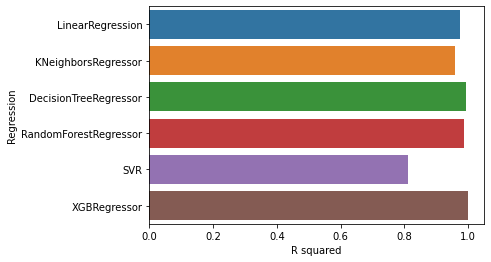

In [30]:
sns.barplot(result['R squared'],result['Regression'])

**Plotting the mean absolute error of various models**

<AxesSubplot:xlabel='MAE', ylabel='Regression'>

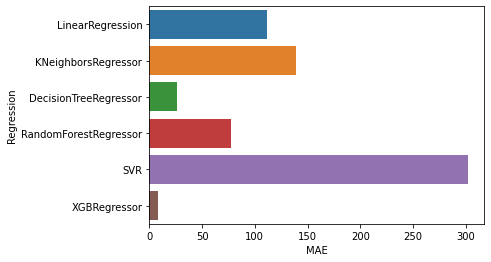

In [31]:
sns.barplot(result['MAE'],result['Regression'])

In [32]:
result

,Regression,R squared,MAE
0,LinearRegression,0.974707,111.354570
1,KNeighborsRegressor,0.958668,139.304348
2,DecisionTreeRegressor,0.994259,26.117787
3,RandomForestRegressor,0.986374,77.523478
4,SVR,0.810411,302.363381
5,XGBRegressor,0.999674,8.267504


**XGBoost Regressor provides the most accurate reuslt with the least mean absolute error.**